Using device: cpu
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\User/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:04<00:00, 11.2MB/s]
Epoch [1/5]: 100%|██████████| 135/135 [01:42<00:00,  1.31it/s, loss=0.582]


Epoch 1: Loss = 0.8183


Epoch [2/5]: 100%|██████████| 135/135 [01:11<00:00,  1.90it/s, loss=0.31] 


Epoch 2: Loss = 0.4739


Epoch [3/5]: 100%|██████████| 135/135 [01:12<00:00,  1.87it/s, loss=0.434]


Epoch 3: Loss = 0.3942


Epoch [4/5]: 100%|██████████| 135/135 [01:16<00:00,  1.77it/s, loss=0.179]


Epoch 4: Loss = 0.3645


Epoch [5/5]: 100%|██████████| 135/135 [01:17<00:00,  1.74it/s, loss=0.203]


Epoch 5: Loss = 0.3409
✅ Model saved to D:\ml_lern\model\flower_classifier.pth


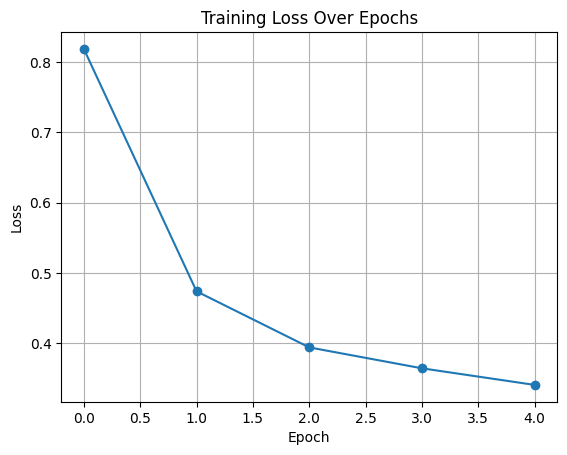

In [ ]:
#CNN just ML app5.py  flower_classifier.h5 .pth   data  in dataset 
#  Imports
import torch
import torchvision
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

#  Paths
data_dir = r'D:\ml_lern\dataset'
model_path = r'D:\ml_lern\model\flower_classifier.pth'
os.makedirs(os.path.dirname(model_path), exist_ok=True)

#  Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
#  Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
#  Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
num_classes = len(class_names)
print("Classes:", class_names)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
#  Load pretrained model
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # freeze pretrained layers

model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)
#  Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
#  Training loop
epochs = 5
train_loss_history = []

model.train()
for epoch in range(epochs):
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]")
    
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")
#  Save model
torch.save({
    'model_state_dict': model.state_dict(),
    'class_names': class_names
}, model_path)

print(f"✅ Model saved to {model_path}")
#  Plot training loss
plt.plot(train_loss_history, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
